In [1]:
import numpy as np
import pandas as pd
import math
from scipy.stats import norm
from scipy.optimize import minimize
import matplotlib.pyplot as plt

## Question 1

Text(0, 0.5, 'Credit Spread')

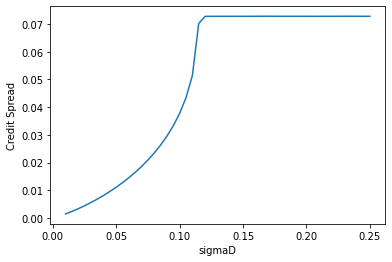

In [161]:
def f_sigmaD(sigmaV, D, E, r, T):
    V = E + D
    d1 = (math.log(V / D) + (r + 0.5 * sigmaV ** 2) * T) / (sigmaV * math.sqrt(T))
    return sigmaV * (1 + (E / D)) *  norm.cdf(-d1)
 
""" 
def fonction_objectif(sigmaV, D, E, r, T, sigmaD):
    sigmaD_estime = f_sigmaD(sigmaV, D, E, r, T)[0]
    return (sigmaD - sigmaD_estime) ** 2

def get_sigmaV(D, E, r, T, sigmaD_observed):
    result = minimize(lambda sigmaV: fonction_objectif(sigmaV, D, E, r, T, sigmaD_observed), x0=[0.2])
    return result.x[0]
"""


D = 60# Debt
E = 100   # Equity
r = 0.00  # Risk-free rate
T = 10 # Time to maturity


# Calculate Credit spread
def f_get_creditSpread(D, E, r, T, sigmaV):
    V = D + E
    d1 = (math.log(V / D) + (r + 0.5 * sigmaV ** 2) * T) / (sigmaV * math.sqrt(T))
    d2 = d1 - (sigmaV * np.sqrt(T))
    return -(math.log(norm.cdf(d2) + V / D * np.exp(-r*T) * norm.cdf(-d1)))/ T


sigmaD = np.linspace(0.01, 0.25, 49)
sigmaV = [get_sigmaV(D, E, r, T, sigmaD_observed) for sigmaD_observed in sigmaD]
res = [f_get_creditSpread(D, E, r, T, sigmaV_tmp) for sigmaV_tmp in sigmaV]

plt.plot(sigmaD,  res)
plt.xlabel("sigmaD")
plt.ylabel("Credit Spread")



#### Cook Version

In [197]:
def d1(V, F, r, sigmaV, T):
    d1 = (math.log(V / F) + (r + 0.5 * sigmaV ** 2) * T) / (sigmaV * math.sqrt(T))
    return d1


def d2(d1, sigmaV, T):
    return  d1 - (sigmaV * np.sqrt(T))


def f_get_creditSpread2(V, F, r, sigmaV, T):
    d1_t = d1(V, F, r, sigmaV, T)
    d2_t = d2(d1_t, sigmaV, T)
    return (-1/T) * math.log(np.exp(-r * T) * norm.cdf(d2_t) + (V/F) * norm.cdf(-d1_t)) - r


# On fixe v à 1
def put_value(V, F, sigmaV, r, T):
    d1_t = d1(V, F, r, sigmaV, T)
    d2_t = d2(d1_t, sigmaV, T)
    return F * np.exp(-r * T) * norm.cdf(-d2_t) - V * norm.cdf(-d1_t)


def f_sigmaD2(V, F, sigmaV, r, T):
    P = put_value(V, F, sigmaV, r, T)
    d1_t = d1(V, F, r, sigmaV, T)
    D = F * np.exp(-r * T) - P
    return sigmaV * V * norm.cdf(-d1_t) / D

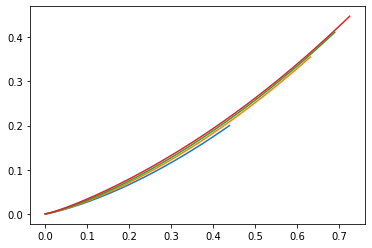

In [232]:
V_arr = [1/x for x in np.linspace(0.04, 0.98, 4)]
F = 1
T = 5
r = 0.05
sigmaV_array = np.linspace(0.01, 1.5 , 150)
for V in V_arr:
    plt.plot([f_sigmaD2(V, F, tmp, r, T) for tmp in sigmaV_array], [f_get_creditSpread2(V, F, r, tmp, T) for tmp in sigmaV_array])


In [14]:
V = D+E
sigmaV[-1] * norm.cdf(-(math.log(V / D) + (r + 0.5 * sigmaV[-1] ** 2) * T) / (sigmaV[-1] * math.sqrt(T)))

0.3157642040209876

In [41]:
sigmaD

array([0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045, 0.05 ,
       0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085, 0.09 , 0.095,
       0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 , 0.135, 0.14 ,
       0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175, 0.18 , 0.185,
       0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 , 0.225, 0.23 ,
       0.235, 0.24 , 0.245, 0.25 ])